w = tensor([0.8228], requires_grad=True),b = tensor([0.9386], requires_grad=True),loss = tensor([0.0164], grad_fn=<DivBackward0>)


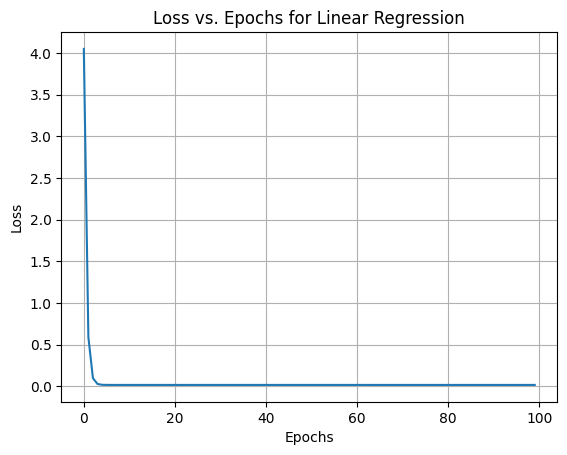

In [24]:
#QUESTION 1
import torch
import matplotlib.pyplot as plt

x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2], dtype=torch.float32)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6], dtype=torch.float32)
b = torch.rand([1], requires_grad=True, dtype=torch.float32)
w = torch.rand([1], requires_grad=True, dtype=torch.float32)
learning_rate = 0.001
loss_list = []

for epoch in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y[j] - y_p) ** 2
    loss = loss / len(x)  
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()
print("w = {},b = {},loss = {}".format(w, b, loss))
plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs for Linear Regression")
plt.grid(True)
plt.show()

In [23]:

#QUESTION 2
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

inp_x = np.array([2, 4])
inp_y = np.array([20, 40])

x = torch.tensor(inp_x)
y = torch.tensor(inp_y)
b = torch.tensor(1., requires_grad=True)
w = torch.tensor(1., requires_grad=True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(2):
    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y[j] - y_p) ** 2
    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    print(w.grad, b.grad)
    w.grad.zero_()
    b.grad.zero_()
    print("w = {},b = {},loss = {}".format(w, b, loss))


def analytical(x, y, w, b):
    for epoch in range(2):
        loss = 0.0
        for j in range(len(x)):
            y_p = x[j] * w + b
            loss += (y_p - y[j]) ** 2
        loss = loss / len(x)
        wgrad, bgrad = 0, 0
        for j in range(len(x)):
            wgrad += (y_p - y[j]) * (x[j])
            bgrad += (y_p - y[j]) * 2
        w -= 0.001 * wgrad * 2 / len(x)
        b -= 0.001 * bgrad * 2 / len(x)
        print(f"w = {w}, b= {b}, loss = {loss}")
    return loss


print("Analytical Solution")
analytical(inp_x, inp_y, 1, 1)

tensor(-174.) tensor(-52.)
w = 1.1740000247955322,b = 1.0520000457763672,loss = 757.0
tensor(-170.2080) tensor(-50.8520)
w = 1.344208002090454,b = 1.1028521060943604,loss = 724.3797607421875
Analytical Solution
w = 1.17, b= 1.1, loss = 757.0
w = 1.3353199999999998, b= 1.1968800000000002, loss = 722.621


np.float64(722.621)

The parameters are w=tensor([12.9092], requires_grad=True),b=tensor([1.2999], requires_grad=True), and loss =484.23883056640625


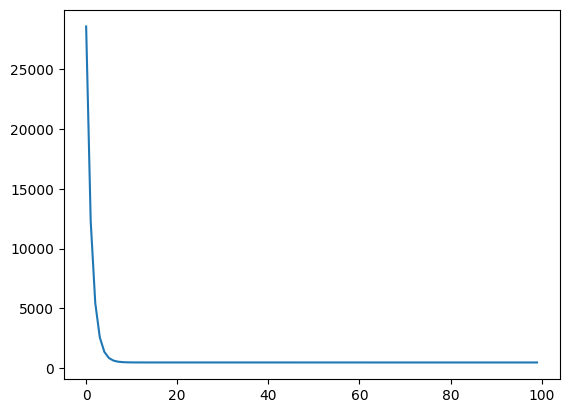

In [30]:
#QUESTION 3
import torch
import matplotlib.pyplot as plt
x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1],requires_grad = True)
        self.b = torch.rand([1],requires_grad = True)
    def forward(self,x):
        return self.w*x + self.b
    def update(self):
        self.w -= learning_rate*self.w.grad
        self.b -= learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j],y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        model.update()
    model.reset_grad()

print("The parameters are w={},b={}, and loss ={}".format(model.w,model.b,loss.item()))

plt.plot(loss_list)

In [ ]:
'''4. Convert your program written in Qn 3 to extend nn.module in your model. Also override
the necessary methods to fit the regression line. Illustrate the use of Dataset and DataLoader
from torch.utils.data in your implementation. Use the SGD Optimizer torch.optim.SGD()'''

The parameters are w=11.893688201904297, b=4.101966857910156, and final loss=613.9370727539062


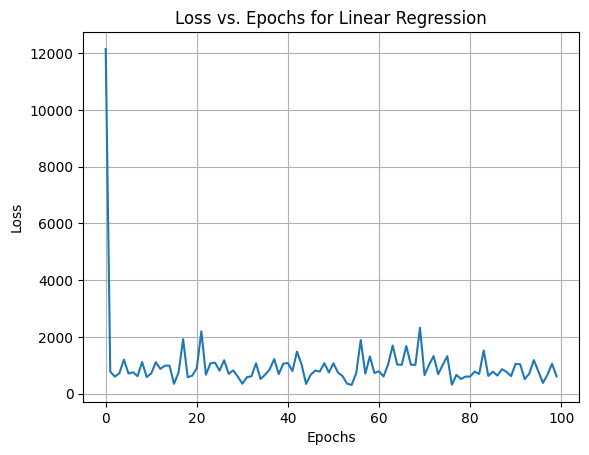

In [16]:
#QUESTION 4
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]


x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
dataset = MyDataset(x, y)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

learning_rate = 0.003
epochs = 100

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1], requires_grad=True))
        self.b = torch.nn.Parameter(torch.rand([1], requires_grad=True))

    def forward(self, x):
        return self.w * x + self.b


loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_list = []
for epoch in range(epochs):
    epoch_loss = 0.0
    for inputs, labels in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(data_loader)
    loss_list.append(avg_loss)

print("The parameters are w={}, b={}, and final loss={}".format(model.w.item(), model.b.item(), avg_loss))

plt.plot(range(epochs), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs for Linear Regression")
plt.grid(True)
plt.show()

In [17]:
#QUESTION 5
import torch
import numpy as np
from torch.autograd import Variable

x = Variable(torch.tensor
    ([12.4 ,14.3 ,14.5 ,14.9 ,16.1 ,16.9 ,16.5 ,15.4 ,17.0 ,17.9 ,18.8 ,20.3 ,22.4 ,19.4 ,15.5 ,16.7 ,17.3 ,18.4 ,19.2
     ,17.4 ,19.5 ,19.7 ,21.2]))
y = Variable(torch.tensor
    ([11.2 ,12.5 ,12.7 ,13.1 ,14.1 ,14.8 ,14.4 ,13.4 ,14.9 ,15.6 ,16.4 ,17.7 ,19.6 ,16.9 ,14.0 ,14.6 ,15.1 ,16.1 ,16.8
     ,15.2 ,17.0 ,17.2 ,18.6]))

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(23, 23)

    def forward(self ,x):
        return self.linear(x)

model = RegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0032)

for epochs in range(100):
    pred_y = model(x)
    loss = criterion(pred_y, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("loss ={}".format(loss.item()))


loss =21.423192977905273


[tensor([3., 6.]), tensor([8., 3.]), tensor([-3.5000, 11.5000])]
[tensor([4., 2.]), tensor([5., 1.]), tensor([3.5000, 5.7000])]
[tensor([5.]), tensor([7.]), tensor([2.5000])]
After 0 epochs, The parameters are w1=0.38691389560699463, w2=0.654194712638855, b=0.13390228152275085, and loss=34.5140
After 33 epochs, The parameters are w1=1.3882429599761963, w2=-0.5198290944099426, b=0.2801450192928314, and loss=7.9216
After 66 epochs, The parameters are w1=1.9819446802139282, w2=-1.0243440866470337, b=0.3939664959907532, and loss=3.0791
After 99 epochs, The parameters are w1=2.296870470046997, w2=-1.2773929834365845, b=0.473335325717926, and loss=1.0107
Final parameters: w1=2.296870470046997, w2=-1.2773929834365845, b=0.473335325717926, final loss=1.0107


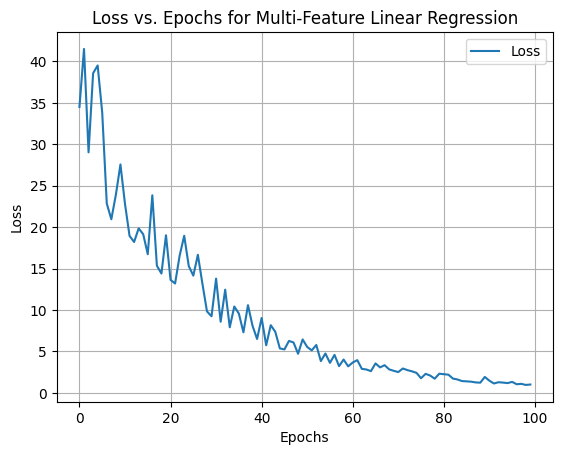

In [31]:
#QUESTION 6
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


class MyDataset(Dataset):
    def __init__(self, X1, X2, Y):
        self.X1 = X1
        self.X2 = X2
        self.Y = Y

    def __len__(self):
        return len(self.X1)

    def __getitem__(self, idx):
        return self.X1[idx], self.X2[idx], self.Y[idx]


x1 = torch.tensor([3, 4, 5, 6, 2], dtype=torch.float32)
x2 = torch.tensor([8, 5, 7, 3, 1], dtype=torch.float32)
y = torch.tensor([-3.5, 3.5, 2.5, 11.5, 5.7], dtype=torch.float32)
dataset = MyDataset(x1, x2, y)
data_loader = DataLoader(dataset, batch_size=2, shuffle=True)

for data in iter(data_loader):
    print(data)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.nn.Parameter(torch.rand([1], requires_grad=True))
        self.w2 = torch.nn.Parameter(torch.rand([1], requires_grad=True))
        self.b = torch.nn.Parameter(torch.rand([1], requires_grad=True))

    def forward(self, x1, x2):
        return self.w1 * x1 + self.w2 * x2 + self.b


loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

loss_list = []  
for epoch in range(100):
    epoch_loss = 0.0
    for i, data in enumerate(data_loader):
        x1, x2, labels = data
        optimizer.zero_grad()
        outputs = model(x1, x2)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(data_loader)
    loss_list.append(avg_loss)  

    if epoch % 33 == 0:
        print(
            f"After {epoch} epochs, The parameters are w1={model.w1.item()}, w2={model.w2.item()}, b={model.b.item()}, and loss={avg_loss:.4f}"
        )


print(
    f"Final parameters: w1={model.w1.item()}, w2={model.w2.item()}, b={model.b.item()}, final loss={avg_loss:.4f}"
)


plt.plot(range(100), loss_list, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs for Multi-Feature Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

After 0 epochs, Parameters: w=0.5339, b=0.2773, Loss=3.4256
After 33 epochs, Parameters: w=0.0405, b=0.1753, Loss=0.6116
After 66 epochs, Parameters: w=0.0417, b=0.0934, Loss=0.5882
After 99 epochs, Parameters: w=0.0430, b=0.0138, Loss=0.5661
Final Parameters: w=0.0430, b=0.0138, Final Loss=0.5661


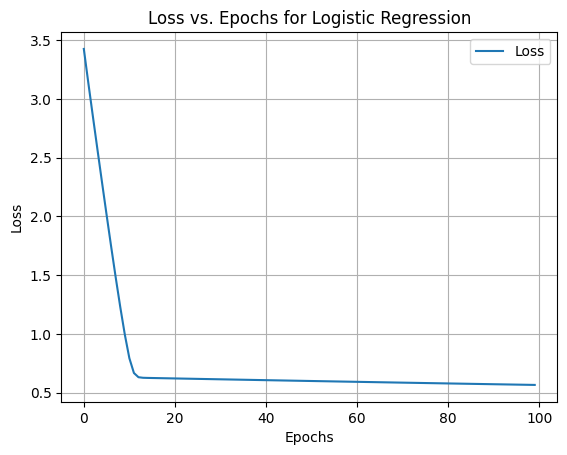

In [19]:
#QUESTION 7
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]


x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32)
dataset = MyDataset(x, y)
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)


class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1], requires_grad=True))
        self.b = torch.nn.Parameter(torch.rand([1], requires_grad=True))

    def forward(self, x):
        return self.w * x + self.b


loss_fn = torch.nn.BCELoss() 
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


loss_list = []  

for epoch in range(100):
    epoch_loss = 0.0
    for i, data in enumerate(data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        sigmoid = torch.nn.Sigmoid()
        outputs = sigmoid(outputs)  
        labels = labels.to(torch.float32)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(data_loader)
    loss_list.append(avg_loss)  

    if epoch % 33 == 0:
        print(
            f"After {epoch} epochs, Parameters: w={model.w.item():.4f}, b={model.b.item():.4f}, Loss={avg_loss:.4f}"
        )

print(
    f"Final Parameters: w={model.w.item():.4f}, b={model.b.item():.4f}, Final Loss={avg_loss:.4f}"
)

plt.plot(range(100), loss_list, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()